#### Import Dependencies

In [1]:
import os
import csv
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import and Cleanup of COVID Data (from The COVID Tracking Project)

In [2]:
# Step 1: Reference to csv data files
covid_path = "Data/COVID_Tracking_By_State_Thru_2020_10_09.csv"

In [3]:
# Step 2: Import csv files and create data frame, print headers to terminal
covid_df = pd.read_csv(covid_path)
covid_df.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,10/9/2020,AK,A,60.0,60.0,0,NaN,NaN,NaN,51.0,...,493070.0,1899,NaN,NaN,NaN,NaN,NaN,0,493070.0,1899
1,10/9/2020,AL,A,2653.0,2496.0,16,157.0,17989.0,17989.0,816.0,...,1196452.0,11742,NaN,NaN,59957.0,NaN,NaN,0,1196452.0,11742
2,10/9/2020,AR,A+,1503.0,1359.0,0,144.0,5805.0,5805.0,546.0,...,1111526.0,0,NaN,21856.0,NaN,25538.0,NaN,0,1111526.0,0
3,10/9/2020,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1616.0,0,NaN,NaN,NaN,NaN,NaN,0,1616.0,0
4,10/9/2020,AZ,A+,5746.0,5460.0,3,286.0,20199.0,20199.0,706.0,...,1543445.0,12350,300333.0,NaN,NaN,NaN,1543445.0,12350,NaN,0


In [4]:
# Step 3: Reset data frame index and include only columns needed for merging and analysis
covid_df = covid_df[[
    'state','date','positive','totalTestResults']]
covid_df.head()

,state,date,positive,totalTestResults
0,AK,10/9/2020,10176.0,493070.0
1,AL,10/9/2020,163465.0,1196452.0
2,AR,10/9/2020,90145.0,1111526.0
3,AS,10/9/2020,0.0,1616.0
4,AZ,10/9/2020,224084.0,1543445.0


In [5]:
# Step 4: Split date by month, day and year
month = []
day = []
year = []

for column in covid_df["date"]:
    splitdate = column.split('/')
    month.append(splitdate[0])
    day.append(splitdate[1])
    year.append(splitdate[2])

covid_df["Month"] = month
covid_df["Day"] = day
covid_df["Year"] = year
covid_df.head()

,state,date,positive,totalTestResults,Month,Day,Year
0,AK,10/9/2020,10176.0,493070.0,10,9,2020
1,AL,10/9/2020,163465.0,1196452.0,10,9,2020
2,AR,10/9/2020,90145.0,1111526.0,10,9,2020
3,AS,10/9/2020,0.0,1616.0,10,9,2020
4,AZ,10/9/2020,224084.0,1543445.0,10,9,2020


In [6]:
# Step 5: Rename columns for readability
covid_df = covid_df.rename(columns={
    'state':'State',
    'positive':'Positive COVID Tests' ,
    'totalTestResults':'Total COVID Tests'
})
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year
0,AK,10/9/2020,10176.0,493070.0,10,9,2020
1,AL,10/9/2020,163465.0,1196452.0,10,9,2020
2,AR,10/9/2020,90145.0,1111526.0,10,9,2020
3,AS,10/9/2020,0.0,1616.0,10,9,2020
4,AZ,10/9/2020,224084.0,1543445.0,10,9,2020


In [7]:
# Step 6: Add calculations as new columns
covid_df["COVID Positivity Rate"] = (covid_df["Positive COVID Tests"] / covid_df["Total COVID Tests"]*100).round(2)
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year,COVID Positivity Rate
0,AK,10/9/2020,10176.0,493070.0,10,9,2020,2.06
1,AL,10/9/2020,163465.0,1196452.0,10,9,2020,13.66
2,AR,10/9/2020,90145.0,1111526.0,10,9,2020,8.11
3,AS,10/9/2020,0.0,1616.0,10,9,2020,0.00
4,AZ,10/9/2020,224084.0,1543445.0,10,9,2020,14.52


In [8]:
# Step 7: convert data frame columns by type (as needed)
# How to convert a Pandas DataFrame column from object to int in Python
# https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-from-object-to-int-in-python
covid_df["Month"] = covid_df["Month"].astype(str).astype(int)
covid_df["Year"] = covid_df["Year"].astype(str).astype(int)
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year,COVID Positivity Rate
0,AK,10/9/2020,10176.0,493070.0,10,9,2020,2.06
1,AL,10/9/2020,163465.0,1196452.0,10,9,2020,13.66
2,AR,10/9/2020,90145.0,1111526.0,10,9,2020,8.11
3,AS,10/9/2020,0.0,1616.0,10,9,2020,0.00
4,AZ,10/9/2020,224084.0,1543445.0,10,9,2020,14.52


In [9]:
# Step 8: Replace values for Month (number) with names for readability
covid_df['Month'] = covid_df['Month'].replace({
    1:"01 Jan",
    2:"02 Feb",
    3:"03 Mar",
    4:"04 Apr",
    5:"05 May",
    6:"06 Jun",
    7:"07 Jul",
    8:"08 Aug",
    9:"09 Sep",
    10:"10 Oct",
    11:"11 Nov",
    12:"12 Dec"
})
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year,COVID Positivity Rate
0,AK,10/9/2020,10176.0,493070.0,10 Oct,9,2020,2.06
1,AL,10/9/2020,163465.0,1196452.0,10 Oct,9,2020,13.66
2,AR,10/9/2020,90145.0,1111526.0,10 Oct,9,2020,8.11
3,AS,10/9/2020,0.0,1616.0,10 Oct,9,2020,0.00
4,AZ,10/9/2020,224084.0,1543445.0,10 Oct,9,2020,14.52


In [10]:
# Step 9: Replace 'State' abbreviation with with names for readability
covid_df['State'] = covid_df['State'].replace({
    'AK':'Alaska','AR':'Arkansas','CO':'Colorado','CT':'Connecticut',
    'FL':'Florida','IL':'Illinois','KS':'Kansas','KY':'Kentucky',
    'LA':'Louisiana','MA':'Massachusetts','MO':'Missouri',
    'ND':'North Dakota','OR':'Oregon','TX':'Texas','VA':'Virginia',
    'WI':'Wisconsin','WA':'Washington','NJ':'New Jersey','MI':'Michigan',
    'RI':'Rhode Island','AZ':'Arizona','HI':'Hawaii','NC':'North Carolina',
    'CA':'California','GA':'Georgia','SC':'South Carolina','NY':'New York',
    'NH':'New Hampshire','MD':'Maryland','NV':'Nevada','TN':'Tennesee',
    'NE':'Nebraska','OH':'Ohio','DC':'District of Columbia','IA':'Iowa',
    'NM':'New Mexico','WV':'West Virginia','IN':'Indiana',
    'MS':'Mississippi','MN':'Minnesota','PA':'Pennsylvania','VT':'Vermont',
    'DE':'Delaware','MT':'Montana','AL':'Alabama','ME':'Maine',
    'WY':'Wyoming','UT':'Utah','ID':'Idaho','OK':'Oklahoma',
    'SD':'South Dakota','VI':'Virgin Islands','AS':'American Samoa',
    'GU':'Guam','MP':'Northern Mariana Islands','PR':'Puerto Rico'    
})
covid_df.head()

,State,date,Positive COVID Tests,Total COVID Tests,Month,Day,Year,COVID Positivity Rate
0,Alaska,10/9/2020,10176.0,493070.0,10 Oct,9,2020,2.06
1,Alabama,10/9/2020,163465.0,1196452.0,10 Oct,9,2020,13.66
2,Arkansas,10/9/2020,90145.0,1111526.0,10 Oct,9,2020,8.11
3,American Samoa,10/9/2020,0.0,1616.0,10 Oct,9,2020,0.00
4,Arizona,10/9/2020,224084.0,1543445.0,10 Oct,9,2020,14.52


In [11]:
# Step 10: Create a .csv file for the cleaned data frame
covid_df.to_csv(r'Data\cleaned_covid_data.csv', index=False)

______________

#### Cleanup of Alcohol Consumption Data (from NIH)

In [12]:
# Step 1: Reference to csv data files
alcohol_path = "Data/NIH_Alcohol_Sales_Thru_Jun2020.csv"

In [13]:
# Step 2: Import csv files and create data frame, print headers to terminal
alcohol_df = pd.read_csv(alcohol_path)
alcohol_df.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017,1,2,1,103645,42598,593378,0.0718,NaN,NaN
1,2017,1,5,1,402885,165586,2455022,0.0674,NaN,NaN
2,2017,1,8,1,733857,301615,4634346,0.0651,NaN,NaN
3,2017,1,9,1,412100,169373,3015481,0.0562,NaN,NaN
4,2017,1,12,1,2770686,1138752,17722275,0.0643,NaN,NaN


In [14]:
# Step 3: Reset data frame index and include only columns needed for merging and analysis
alcohol_df = alcohol_df[[
    'FIPS','Year','Month','Beverage','Ethanol',
    'Population','PerCapita','PerCapita3yr','PctChange']]
alcohol_df.head()

,FIPS,Year,Month,Beverage,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2,2017,1,1,42598,593378,0.0718,NaN,NaN
1,5,2017,1,1,165586,2455022,0.0674,NaN,NaN
2,8,2017,1,1,301615,4634346,0.0651,NaN,NaN
3,9,2017,1,1,169373,3015481,0.0562,NaN,NaN
4,12,2017,1,1,1138752,17722275,0.0643,NaN,NaN


In [15]:
# Step 4: Rename columns for readability
alcohol_df = alcohol_df.rename(columns={
    'FIPS':'State',
})
alcohol_df.head()

,State,Year,Month,Beverage,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2,2017,1,1,42598,593378,0.0718,NaN,NaN
1,5,2017,1,1,165586,2455022,0.0674,NaN,NaN
2,8,2017,1,1,301615,4634346,0.0651,NaN,NaN
3,9,2017,1,1,169373,3015481,0.0562,NaN,NaN
4,12,2017,1,1,1138752,17722275,0.0643,NaN,NaN


In [16]:
# Step 5: Replace values for Beverage (code) with names for readability
alcohol_df['Beverage'] = alcohol_df['Beverage'].replace({
    1:'Spirits',
    2:'Wine',
    3:'Beer'
})
alcohol_df.head()

,State,Year,Month,Beverage,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2,2017,1,Spirits,42598,593378,0.0718,NaN,NaN
1,5,2017,1,Spirits,165586,2455022,0.0674,NaN,NaN
2,8,2017,1,Spirits,301615,4634346,0.0651,NaN,NaN
3,9,2017,1,Spirits,169373,3015481,0.0562,NaN,NaN
4,12,2017,1,Spirits,1138752,17722275,0.0643,NaN,NaN


In [17]:
# Step 6: Replace values for State (code) with names for readability
alcohol_df['State'] = alcohol_df['State'].replace({
    2:'Alaska',5:'Arkansas',8:'Colorado',9:'Connecticut',12:'Florida',
    17:'Illinois',20:'Kansas',21:'Kentucky',22:'Louisiana',
    25:'Massachusetts',29:'Missouri',38:'North Dakota',41:'Oregon',
    48:'Texas',51:'Virginia',55:'Wisconsin'
})
alcohol_df.head()

,State,Year,Month,Beverage,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,Alaska,2017,1,Spirits,42598,593378,0.0718,NaN,NaN
1,Arkansas,2017,1,Spirits,165586,2455022,0.0674,NaN,NaN
2,Colorado,2017,1,Spirits,301615,4634346,0.0651,NaN,NaN
3,Connecticut,2017,1,Spirits,169373,3015481,0.0562,NaN,NaN
4,Florida,2017,1,Spirits,1138752,17722275,0.0643,NaN,NaN


In [18]:
# Step 7: Replace values for Month (number) with names for readability
alcohol_df['Month'] = alcohol_df['Month'].replace({
    1:"01 Jan",
    2:"02 Feb",
    3:"03 Mar",
    4:"04 Apr",
    5:"05 May",
    6:"06 Jun",
    7:"07 Jul",
    8:"08 Aug",
    9:"09 Sep",
    10:"10 Oct",
    11:"11 Nov",
    12:"12 Dec"
})
alcohol_df.head()

,State,Year,Month,Beverage,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,Alaska,2017,01 Jan,Spirits,42598,593378,0.0718,NaN,NaN
1,Arkansas,2017,01 Jan,Spirits,165586,2455022,0.0674,NaN,NaN
2,Colorado,2017,01 Jan,Spirits,301615,4634346,0.0651,NaN,NaN
3,Connecticut,2017,01 Jan,Spirits,169373,3015481,0.0562,NaN,NaN
4,Florida,2017,01 Jan,Spirits,1138752,17722275,0.0643,NaN,NaN


In [19]:
# Step 8: Add calculations as new columns
alcohol_df["PerCapita"] = (alcohol_df["PerCapita"]*100).round(2)
alcohol_df.head()

,State,Year,Month,Beverage,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,Alaska,2017,01 Jan,Spirits,42598,593378,7.18,NaN,NaN
1,Arkansas,2017,01 Jan,Spirits,165586,2455022,6.74,NaN,NaN
2,Colorado,2017,01 Jan,Spirits,301615,4634346,6.51,NaN,NaN
3,Connecticut,2017,01 Jan,Spirits,169373,3015481,5.62,NaN,NaN
4,Florida,2017,01 Jan,Spirits,1138752,17722275,6.43,NaN,NaN


In [20]:
# Step 8: Add calculations as new columns
alcohol_df["PerCapita3yr"] = (alcohol_df["PerCapita3yr"]*100).round(2)
alcohol_df.head()

,State,Year,Month,Beverage,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,Alaska,2017,01 Jan,Spirits,42598,593378,7.18,NaN,NaN
1,Arkansas,2017,01 Jan,Spirits,165586,2455022,6.74,NaN,NaN
2,Colorado,2017,01 Jan,Spirits,301615,4634346,6.51,NaN,NaN
3,Connecticut,2017,01 Jan,Spirits,169373,3015481,5.62,NaN,NaN
4,Florida,2017,01 Jan,Spirits,1138752,17722275,6.43,NaN,NaN


In [21]:
# Step 9: Create a .csv file for the cleaned data frame
alcohol_df.to_csv(r'Data\cleaned_alcohol_data.csv', index=False)

______________

#### Alcohol Consumption Data (NIH)

In [22]:
season_df = alcohol_df.groupby(['Year', 'Month']).agg({'PerCapita': ['mean']})
season_df.columns = ['PerCapita']
season_df.reset_index(inplace=True)
season_df.head()

,Year,Month,PerCapita
0,2017,01 Jan,5.745909
1,2017,02 Feb,5.665909
2,2017,03 Mar,6.685909
3,2017,04 Apr,6.668636
4,2017,05 May,7.155682


In [23]:
season_df["Year"].unique().tolist()
for y in season_df["Year"].unique().tolist():
    season_df[y] = season_df.loc[ season_df["Year"]== y ,'PerCapita']
    
plot_df =season_df.copy(deep=True)
plot_df = plot_df.drop(columns=["Year","PerCapita"]).set_index("Month").round(1)
plot_df = pd.DataFrame({ col: plot_df[col].dropna() for col in plot_df.columns})
plot_df = plot_df.apply (pd.to_numeric, errors='coerce')
plot_df = plot_df.dropna()
plot_df.head()

,2017,2018,2019,2020
01 Jan,5.7,5.7,6.1,6.2
02 Feb,5.7,5.6,5.6,5.9
03 Mar,6.7,6.4,6.3,6.7
04 Apr,6.7,6.5,6.8,6.7
05 May,7.2,7.4,7.3,7.1


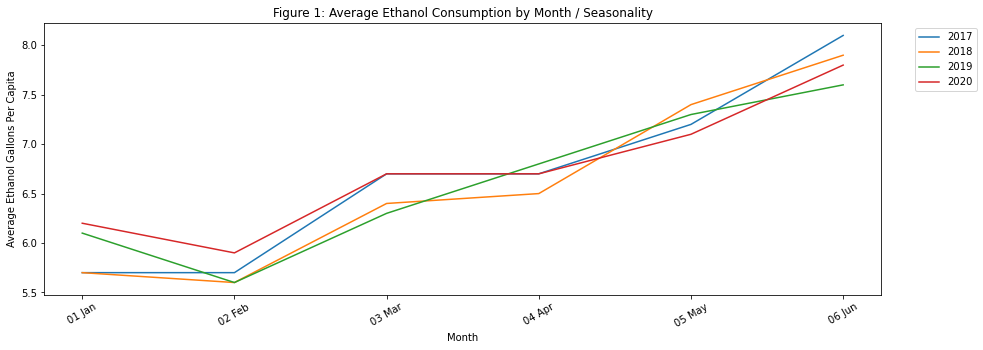

In [24]:
plot_df.plot(figsize=(15,5))
plt.xlabel("Month")
plt.ylabel("Average Ethanol Gallons Per Capita")
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1))
plt.title("Figure 1: Average Ethanol Consumption by Month / Seasonality")
plt.savefig("Images/fig1.png")

In [25]:
season_df["Year"].unique().tolist()
for y in season_df["Year"].unique().tolist():
    season_df[y] = season_df.loc[ season_df["Year"]== y ,'PerCapita']
    
plot_df =season_df.copy(deep=True)
plot_df = plot_df.drop(columns=["Year","PerCapita"]).set_index("Month").round(1)
plot_df = pd.DataFrame({ col: plot_df[col].dropna() for col in plot_df.columns})
plot_df = plot_df.apply (pd.to_numeric, errors='coerce')
plot_df = plot_df.dropna()
plot_df.head()

,2017,2018,2019,2020
01 Jan,5.7,5.7,6.1,6.2
02 Feb,5.7,5.6,5.6,5.9
03 Mar,6.7,6.4,6.3,6.7
04 Apr,6.7,6.5,6.8,6.7
05 May,7.2,7.4,7.3,7.1


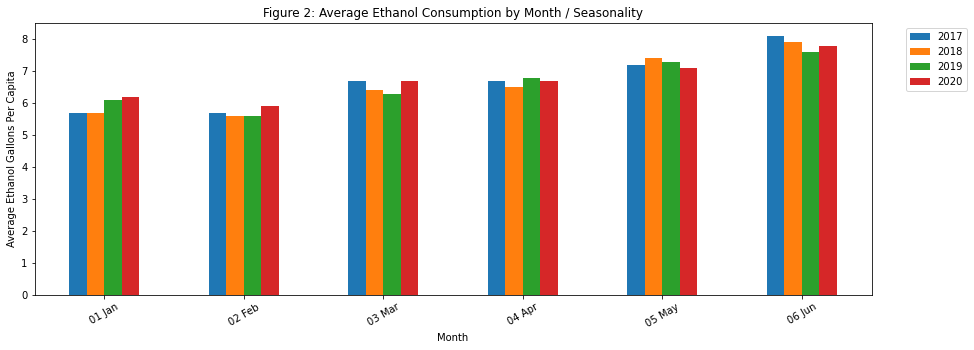

In [26]:
plot_df.plot(kind='bar', figsize=(15,5), align="center")
plt.xlabel("Month")
plt.ylabel("Average Ethanol Gallons Per Capita")
plt.xticks(rotation=30, horizontalalignment="center")
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1))
plt.title("Figure 2: Average Ethanol Consumption by Month / Seasonality")
plt.savefig("Images/fig2.png")

In [27]:
groups = [[0.090188*100, 0.088401*100, 0.087805*100, 0.083765*100], 
          [0.080462*100, 0.081422*100, 0.084167*100, 0.084339*100], 
          [0.036707*100, 0.036455*100, 0.035961*100, 0.035041*100]]
group_legend = ['2017', '2018', '2019', '2020']
group_labels = ['Beer', 'Spirits', 'Wine']

bar2_df = pd.DataFrame(groups, index=group_labels).T
bar2_df.head()

,Beer,Spirits,Wine
0,9.0188,8.0462,3.6707
1,8.8401,8.1422,3.6455
2,8.7805,8.4167,3.5961
3,8.3765,8.4339,3.5041


In [28]:
bar2_df['Year'] = group_legend
bar2_df = bar2_df.set_index('Year').round(2)
bar2_df

,Beer,Spirits,Wine
Year,,,
2017,9.02,8.05,3.67
2018,8.84,8.14,3.65
2019,8.78,8.42,3.60
2020,8.38,8.43,3.50


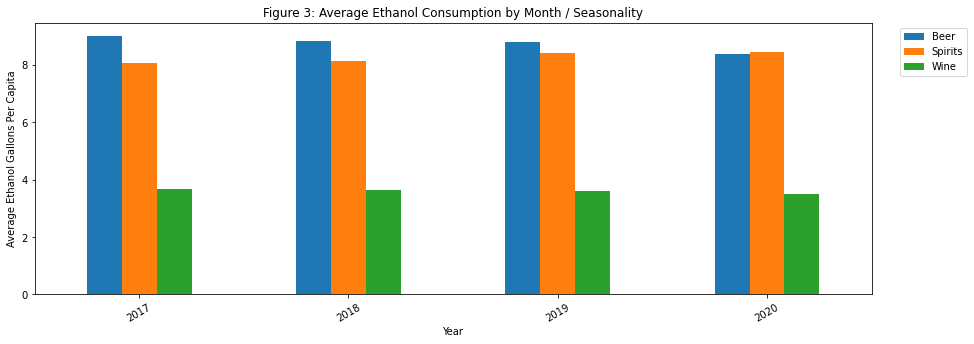

In [29]:
bar2_df.plot(kind='bar', figsize=(15,5), align="center")
plt.title("Figure 3: Average Ethanol Consumption by Month / Seasonality")
plt.xlabel("Year")
plt.ylabel("Average Ethanol Gallons Per Capita")
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1))
plt.savefig("Images/fig3.png")

In [30]:
# 2.1
season_df = alcohol_df.groupby(['Year', 'Month']).agg({'PerCapita': ['sum']})
season_df.columns = ['PerCapita']
season_df.reset_index(inplace=True)
season_df.head()

,Year,Month,PerCapita
0,2017,01 Jan,252.82
1,2017,02 Feb,249.30
2,2017,03 Mar,294.18
3,2017,04 Apr,293.42
4,2017,05 May,314.85


In [31]:
# 2.2
season_df["Year"].unique().tolist()
for y in season_df["Year"].unique().tolist():
    season_df[y] = season_df.loc[ season_df["Year"]== y ,'PerCapita']
    
plot_df =season_df.copy(deep=True)
plot_df = plot_df.drop(columns=["Year","PerCapita"]).set_index("Month").round(0)
plot_df = pd.DataFrame({ col: plot_df[col].dropna() for col in plot_df.columns})
plot_df = plot_df.apply (pd.to_numeric, errors='coerce')
plot_df = plot_df.dropna()
plot_df.head()

,2017,2018,2019,2020
01 Jan,253.0,252.0,270.0,275.0
02 Feb,249.0,247.0,246.0,260.0
03 Mar,294.0,281.0,278.0,297.0
04 Apr,293.0,285.0,299.0,296.0
05 May,315.0,327.0,323.0,292.0


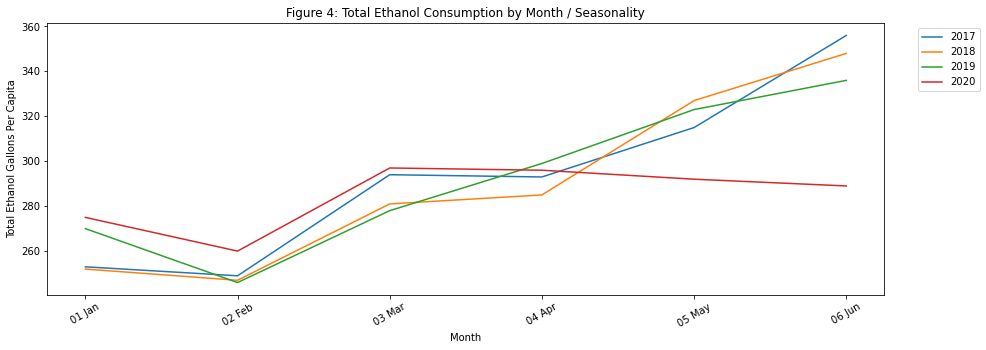

In [32]:
plot_df.plot(figsize=(15,5))
plt.xlabel("Month")
plt.ylabel("Total Ethanol Gallons Per Capita")
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1))
plt.title("Figure 4: Total Ethanol Consumption by Month / Seasonality")
plt.savefig("Images/fig4.png")

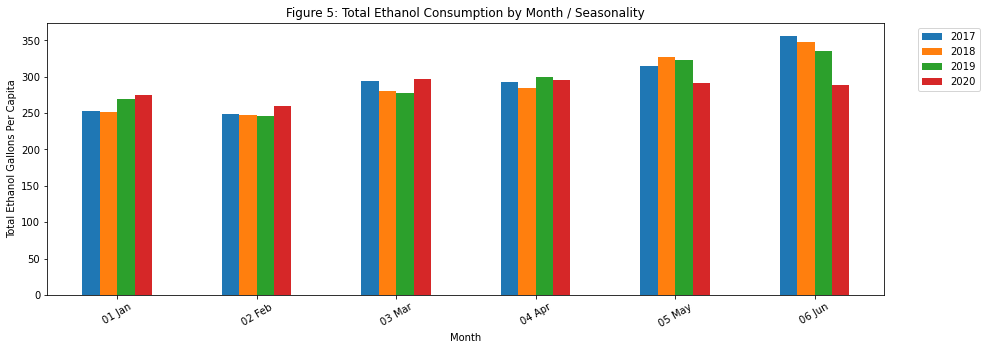

In [33]:
plot_df.plot(kind='bar', figsize=(15,5), align="center")
plt.xlabel("Month")
plt.ylabel("Total Ethanol Gallons Per Capita")
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1))
plt.title("Figure 5: Total Ethanol Consumption by Month / Seasonality")
plt.savefig("Images/fig5.png")

__________________________

#### Merge The Two Data Frames

In [34]:
# Merge the cleaned data frames: covid_df and alcohol_df
merged_df = pd.merge(alcohol_df, covid_df, how="left", on=("State","Year","Month"))
merged_df.head()

,State,Year,Month,Beverage,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,date,Positive COVID Tests,Total COVID Tests,Day,COVID Positivity Rate
0,Alaska,2017,01 Jan,Spirits,42598,593378,7.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arkansas,2017,01 Jan,Spirits,165586,2455022,6.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Colorado,2017,01 Jan,Spirits,301615,4634346,6.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Connecticut,2017,01 Jan,Spirits,169373,3015481,5.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Florida,2017,01 Jan,Spirits,1138752,17722275,6.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# create a csv with the merged, cleaned data
merged_df.to_csv(r'Data\covid_v_alcohol.csv', index=False)

__________________

#### Question #1:
What, if any, non-Pandemic year alcohol consumption rate changes occur with a given year? (i.e. Seasonality)

#### Question #2:
Did alcohol consumption change in 2020/Pandemic months from the prior year? (i.e. sum)

#### Question #3:
How did COVID shutdowns and infections rates affect alcohol consumption – if at all?

#### Question #5:
Did regions not affected by shutdowns see any significant changes in alcohol consumption?

#### Question #6:
Were alcohol consumption rates associated with infection rates? Or vice versa.

#### Optional: Alcoholic Beverage Preference by Year